# Song Recommendation System
* Business Objective
* Data Collection and Understanding
* Exploratory Data Analysis
* Recommendation System

## 1. Business Objective: 
* The goal of this project is to help company XYZ get some basic info about their users as well as building a preliminary song recommendation model in order to increase user engagement.
* Tasks/Questions include:
    * What are the top 3 and the bottom 3 states in terms of number of users?
    * What are the top 3 and the bottom 3 states in terms of user engagement?
    * Give the CEO a list of the ﬁrst users who signed-up for each state. 
    * Build a song recommendation model for the most likely songs to be listened next.

## 2. Data Collection and Understanding

In [1]:
import json 
import pandas as pd
pd.set_option('display.max_column',100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
 
# Open the json file
with open('song.json') as f:
    songfile = json.load(f)

In [2]:
# Look at the first record of the input
songfile[0]

{'id': 'GOQMMKSQQH',
 'user_id': 122,
 'user_state': 'Louisiana',
 'user_sign_up_date': '2015-05-16',
 'song_played': 'Hey Jude',
 'time_played': '2015-06-11 21:51:35'}

In [3]:
# Save the json input to pandas DataFrame and check the structure information
data = pd.DataFrame(songfile)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
id                   4000 non-null object
song_played          4000 non-null object
time_played          4000 non-null object
user_id              4000 non-null int64
user_sign_up_date    4000 non-null object
user_state           4000 non-null object
dtypes: int64(1), object(5)
memory usage: 187.6+ KB


In [4]:
# Look at the first few entries
data.head()

,id,song_played,time_played,user_id,user_sign_up_date,user_state
0,GOQMMKSQQH,Hey Jude,2015-06-11 21:51:35,122,2015-05-16,Louisiana
1,HWKKBQKNWI,We Can Work It Out,2015-06-06 16:49:19,3,2015-05-01,Ohio
2,DKQSXVNJDH,Back In the U.S.S.R.,2015-06-14 02:11:29,35,2015-05-04,New Jersey
3,HLHRIDQTUW,P.s. I Love You,2015-06-08 12:26:10,126,2015-05-16,Illinois
4,SUKJCSBCYW,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00,6,2015-05-01,New Jersey


In [5]:
# Check missing value
data.isnull().sum()

id                   0
song_played          0
time_played          0
user_id              0
user_sign_up_date    0
user_state           0
dtype: int64

In [6]:
# Check duplicates
data.duplicated().sum()

0

## 3. Exploratory Data Analysis:
* Univariate visualization and summary statistics for variables in the raw dataset
* Bivariate visualization and summary statistics for assessing the relationship between each variable in the dataset
* Multivariate visualizations to understand interactions between different fields in the data
* Feature Engineering: use domain knowledge to create additional relevant features from the existing raw features in the data, and to increase the predictive power of the learning algorithm

In [7]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
seaborn.set_style('whitegrid')

In [8]:
# Convert user id to categorical variable
data['user_id'] = data['user_id'].astype('category')
data.describe()

,id,song_played,time_played,user_id,user_sign_up_date,user_state
count,4000,4000,4000,4000,4000,4000
unique,4000,100,3997,196,20,41
top,HMTTVVKLWE,Come Together,2015-06-15 13:23:02,42,2015-05-19,New York
freq,1,408,2,52,532,469


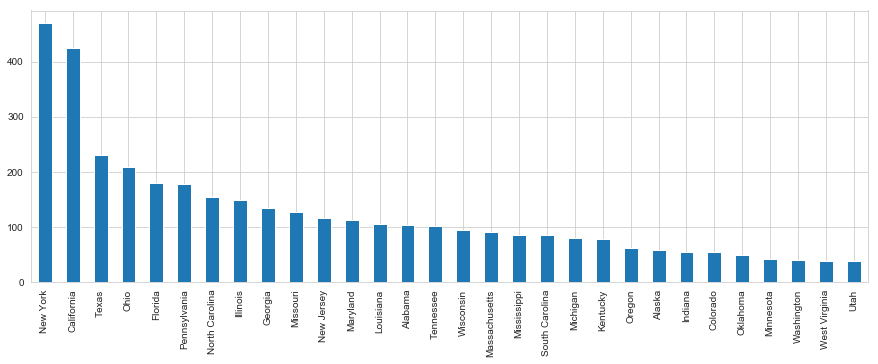

In [9]:
# Look at the states with most records in the data
data['user_state'].value_counts().head(30).plot(kind='bar', figsize=(15,5))

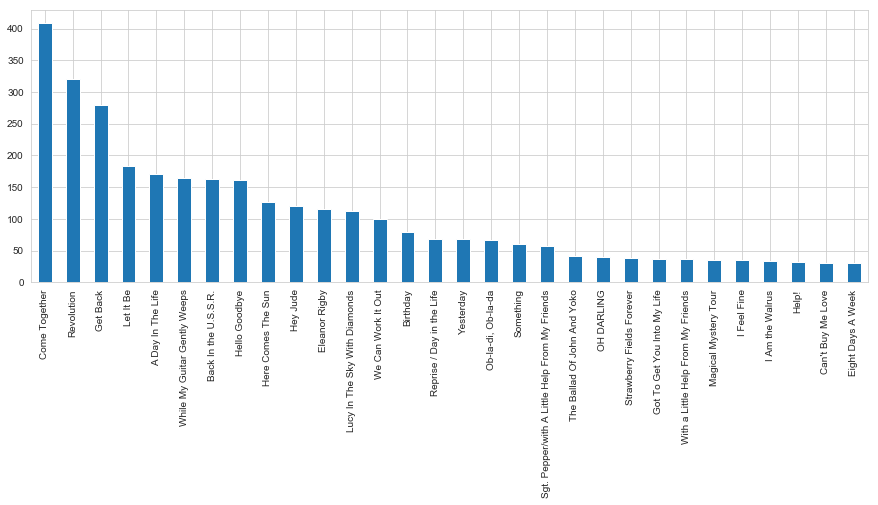

In [10]:
# Look at the most listened songs in the data
data['song_played'].value_counts().head(30).plot(kind='bar', figsize=(15,5))

### 3.1 Top 3 and the bottom 3 states in terms of number of users

In [11]:
state_grouped = data.groupby('user_state').agg({'user_id': 'count'}).reset_index()
state_sorted = state_grouped.sort_values(('user_id'), ascending=False)
state_sorted.head(10)

,user_state,user_id
25,New York,469
4,California,425
35,Texas,230
28,Ohio,209
7,Florida,180
31,Pennsylvania,179
26,North Carolina,154
10,Illinois,149
8,Georgia,135
21,Missouri,127


In [12]:
print('The 3 states with most users:')
print(state_sorted[:3])
print('')
print('The 3 states with least users:')
print(state_sorted[-3:])

The 3 states with most users:
    user_state  user_id
25    New York      469
4   California      425
35       Texas      230

The 3 states with least users:
     user_state  user_id
37     Virginia       17
6   Connecticut       16
13       Kansas        8


### 3.2 Top 3 and the bottom 3 states in terms of user engagement
* Or in which states users are using the product a lot / very little

In [13]:
engagement_grouped = data.groupby('user_state').agg({"time_played": 'count'}).reset_index()
engagement_sorted = engagement_grouped.sort_values(('time_played'), ascending=False)
engagement_sorted.head(10)

,user_state,time_played
25,New York,469
4,California,425
35,Texas,230
28,Ohio,209
7,Florida,180
31,Pennsylvania,179
26,North Carolina,154
10,Illinois,149
8,Georgia,135
21,Missouri,127


In [14]:
print("The 3 states with most user activities (playing):")
print(engagement_sorted[:3])
print('')
print("The 3 states with least user activities (playing):")
print(engagement_sorted[-3:])

The 3 states with most user activities (playing):
    user_state  time_played
25    New York          469
4   California          425
35       Texas          230

The 3 states with least user activities (playing):
     user_state  time_played
37     Virginia           17
6   Connecticut           16
13       Kansas            8


### 3.3 List of the ﬁrst users who signed up for each state

In [15]:
# Look at the first sign up date for each state and each user
signup_grouped = data.groupby(['user_state', 'user_id']).agg({'user_sign_up_date': ['min']}).reset_index()
signup_grouped.head(10)

,user_state,user_id,user_sign_up_date
,,,min
0,Alabama,5,2015-05-01
1,Alabama,89,2015-05-10
2,Alabama,138,2015-05-17
3,Alabama,148,2015-05-18
4,Alaska,106,2015-05-12
5,Alaska,195,2015-05-20
6,Arizona,105,2015-05-12
7,Arkansas,78,2015-05-08
8,Arkansas,124,2015-05-16


In [16]:
# Here is the desired output: the list of the ﬁrst users who signed up for each state
data_sorted = data.sort_values('user_sign_up_date', ascending=True)
first_signup_user = data_sorted.groupby('user_state').agg({'user_id': 'first'}).reset_index()
first_signup_user

,user_state,user_id
0,Alabama,5
1,Alaska,106
2,Arizona,105
3,Arkansas,78
4,California,39
5,Colorado,173
6,Connecticut,127
7,Florida,41
8,Georgia,20
9,Idaho,165


## 4. Recommendation System
* Build a song recommendation model for the most likely songs to be listened next.

In [17]:
df_user_song = data.sort_values(by=['user_id', 'time_played'], ascending=True).reset_index()[['user_id', 'song_played', 'time_played']]
df_user_song

,user_id,song_played,time_played
0,1,Yesterday,2015-06-05 14:30:22
1,1,While My Guitar Gently Weeps,2015-06-07 18:54:56
2,1,The Long And Winding Road,2015-06-08 22:37:41
3,1,Reprise / Day in the Life,2015-06-10 18:00:05
4,1,I Feel Fine,2015-06-15 15:46:46
5,1,Hello Goodbye,2015-06-19 14:54:57
6,1,Here Comes The Sun,2015-06-21 21:53:48
7,1,Can't Buy Me Love,2015-06-22 08:05:01
8,1,Birthday,2015-06-25 12:32:22
9,1,Here Comes The Sun,2015-06-25 20:28:47


In [18]:
# Get the very next song the user listened to
df_user_song['next_song'] = np.nan

for i in range(len(df_user_song)-1):
    if df_user_song['user_id'][i] == df_user_song['user_id'][i+1]:
        df_user_song['next_song'][i] = df_user_song['song_played'][i+1]
    else:
        df_user_song['next_song'][i] = np.nan
    
df_user_song

,user_id,song_played,time_played,next_song
0,1,Yesterday,2015-06-05 14:30:22,While My Guitar Gently Weeps
1,1,While My Guitar Gently Weeps,2015-06-07 18:54:56,The Long And Winding Road
2,1,The Long And Winding Road,2015-06-08 22:37:41,Reprise / Day in the Life
3,1,Reprise / Day in the Life,2015-06-10 18:00:05,I Feel Fine
4,1,I Feel Fine,2015-06-15 15:46:46,Hello Goodbye
5,1,Hello Goodbye,2015-06-19 14:54:57,Here Comes The Sun
6,1,Here Comes The Sun,2015-06-21 21:53:48,Can't Buy Me Love
7,1,Can't Buy Me Love,2015-06-22 08:05:01,Birthday
8,1,Birthday,2015-06-25 12:32:22,Here Comes The Sun
9,1,Here Comes The Sun,2015-06-25 20:28:47,NaN


In [19]:
# Get the list of songs those are most likely to be listened next
df_next_song = df_user_song.groupby('song_played')['next_song'].agg(lambda x: x.dropna().mode())
df_next_song

song_played
A Day In The Life                                                                              Come Together
A Hard Day's Night                                                                                 Let It Be
A Saturday Club Xmas/Crimble Medley                                                [A Day In The Life, GIRL]
ANYTIME AT ALL                                             [Can't Buy Me Love, Helter Skelter, Here Comes...
Across The Universe                                        [A Day In The Life, Come Together, Here Comes ...
All My Loving                                              [Hey Jude, Reprise / Day in the Life, Sgt. Pep...
All You Need Is Love                                                 [Eleanor Rigby, IN MY LIFE, Revolution]
And Your Bird Can Sing                                                                         Come Together
BAD BOY                                                    [A Day In The Life, Don't Let Me Down, Got To ...
BALLAD 

The above list shows which songs are most likely to be listened next to the current songs.